# Assignment #3: Predicting Disease Progression Using Linear Regression

* Date: 16-06-2025
* Student name: Chaw Su Su Thinn
* Student ID: c0916347

## Objective

To understand and apply linear regression using Scikit-learn by analyzing the diabetes dataset. 
Students will explore data preprocessing, model training, evaluation, and interpretation of results.

## Background

The diabetes dataset is a classic dataset provided by Scikit-learn that includes medical information for diabetes patients. 
The goal is to predict disease progression one year after baseline measurements, using ten baseline variables.

## Dataset Features

Based on the **scikit-learn** documentations regarding **diabetes-dataset**

There are ten baseline variables: age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of 442 diabetes patients. 
The target is a quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

* Number of Instances: 442

* Number of Attributes: First 10 columns are numeric predictive values

* Target: Column 11 is a quantitative measure of disease progression one year after baseline

* Attribute Information:

    * age in years

    * sex

    * bmi body mass index

    * bp average blood pressure

    * s1 tc, total serum cholesterol

    * s2 ldl, low-density lipoproteins

    * s3 hdl, high-density lipoproteins

    * s4 tch, total cholesterol / HDL

    * s5 ltg, possibly log of serum triglycerides level

    * s6 glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1). 

(scikit-learn, 2022)

## Import Libraries

In [46]:
import pandas as pd347
import seaborn as sns347
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt347
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np347
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
import statsmodels.api as sm347

## Exploratory Data Analysis (EDA)

Load the diabetes dataset using Scikit-learn’s load_diabetes() function, or
import from diabetes.csv if using a CSV version.

In [47]:
# Load dataset from scikit-learn
diabetes347 = load_diabetes()

In [48]:
# Check target values
diabetes347.target[:3]

array([151.,  75., 141.])

In [49]:
# Check feature shapes
diabetes347.data.shape

(442, 10)

In [50]:
# Create dataframe for features
X = pd347.DataFrame(diabetes347.data, columns=diabetes347.feature_names)

# Create target variable as series
y = pd347.Series(diabetes347.target, name="target")

Display the first few rows and understand the data distribution

In [51]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [52]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [54]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [55]:
X.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [56]:
# Concatenate dataframe and target (series) to get full dataframe
df = pd347.concat([X, y], axis=1)
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


Visualize relationships between features and the target variable using
scatter plots or correlation heatmaps.

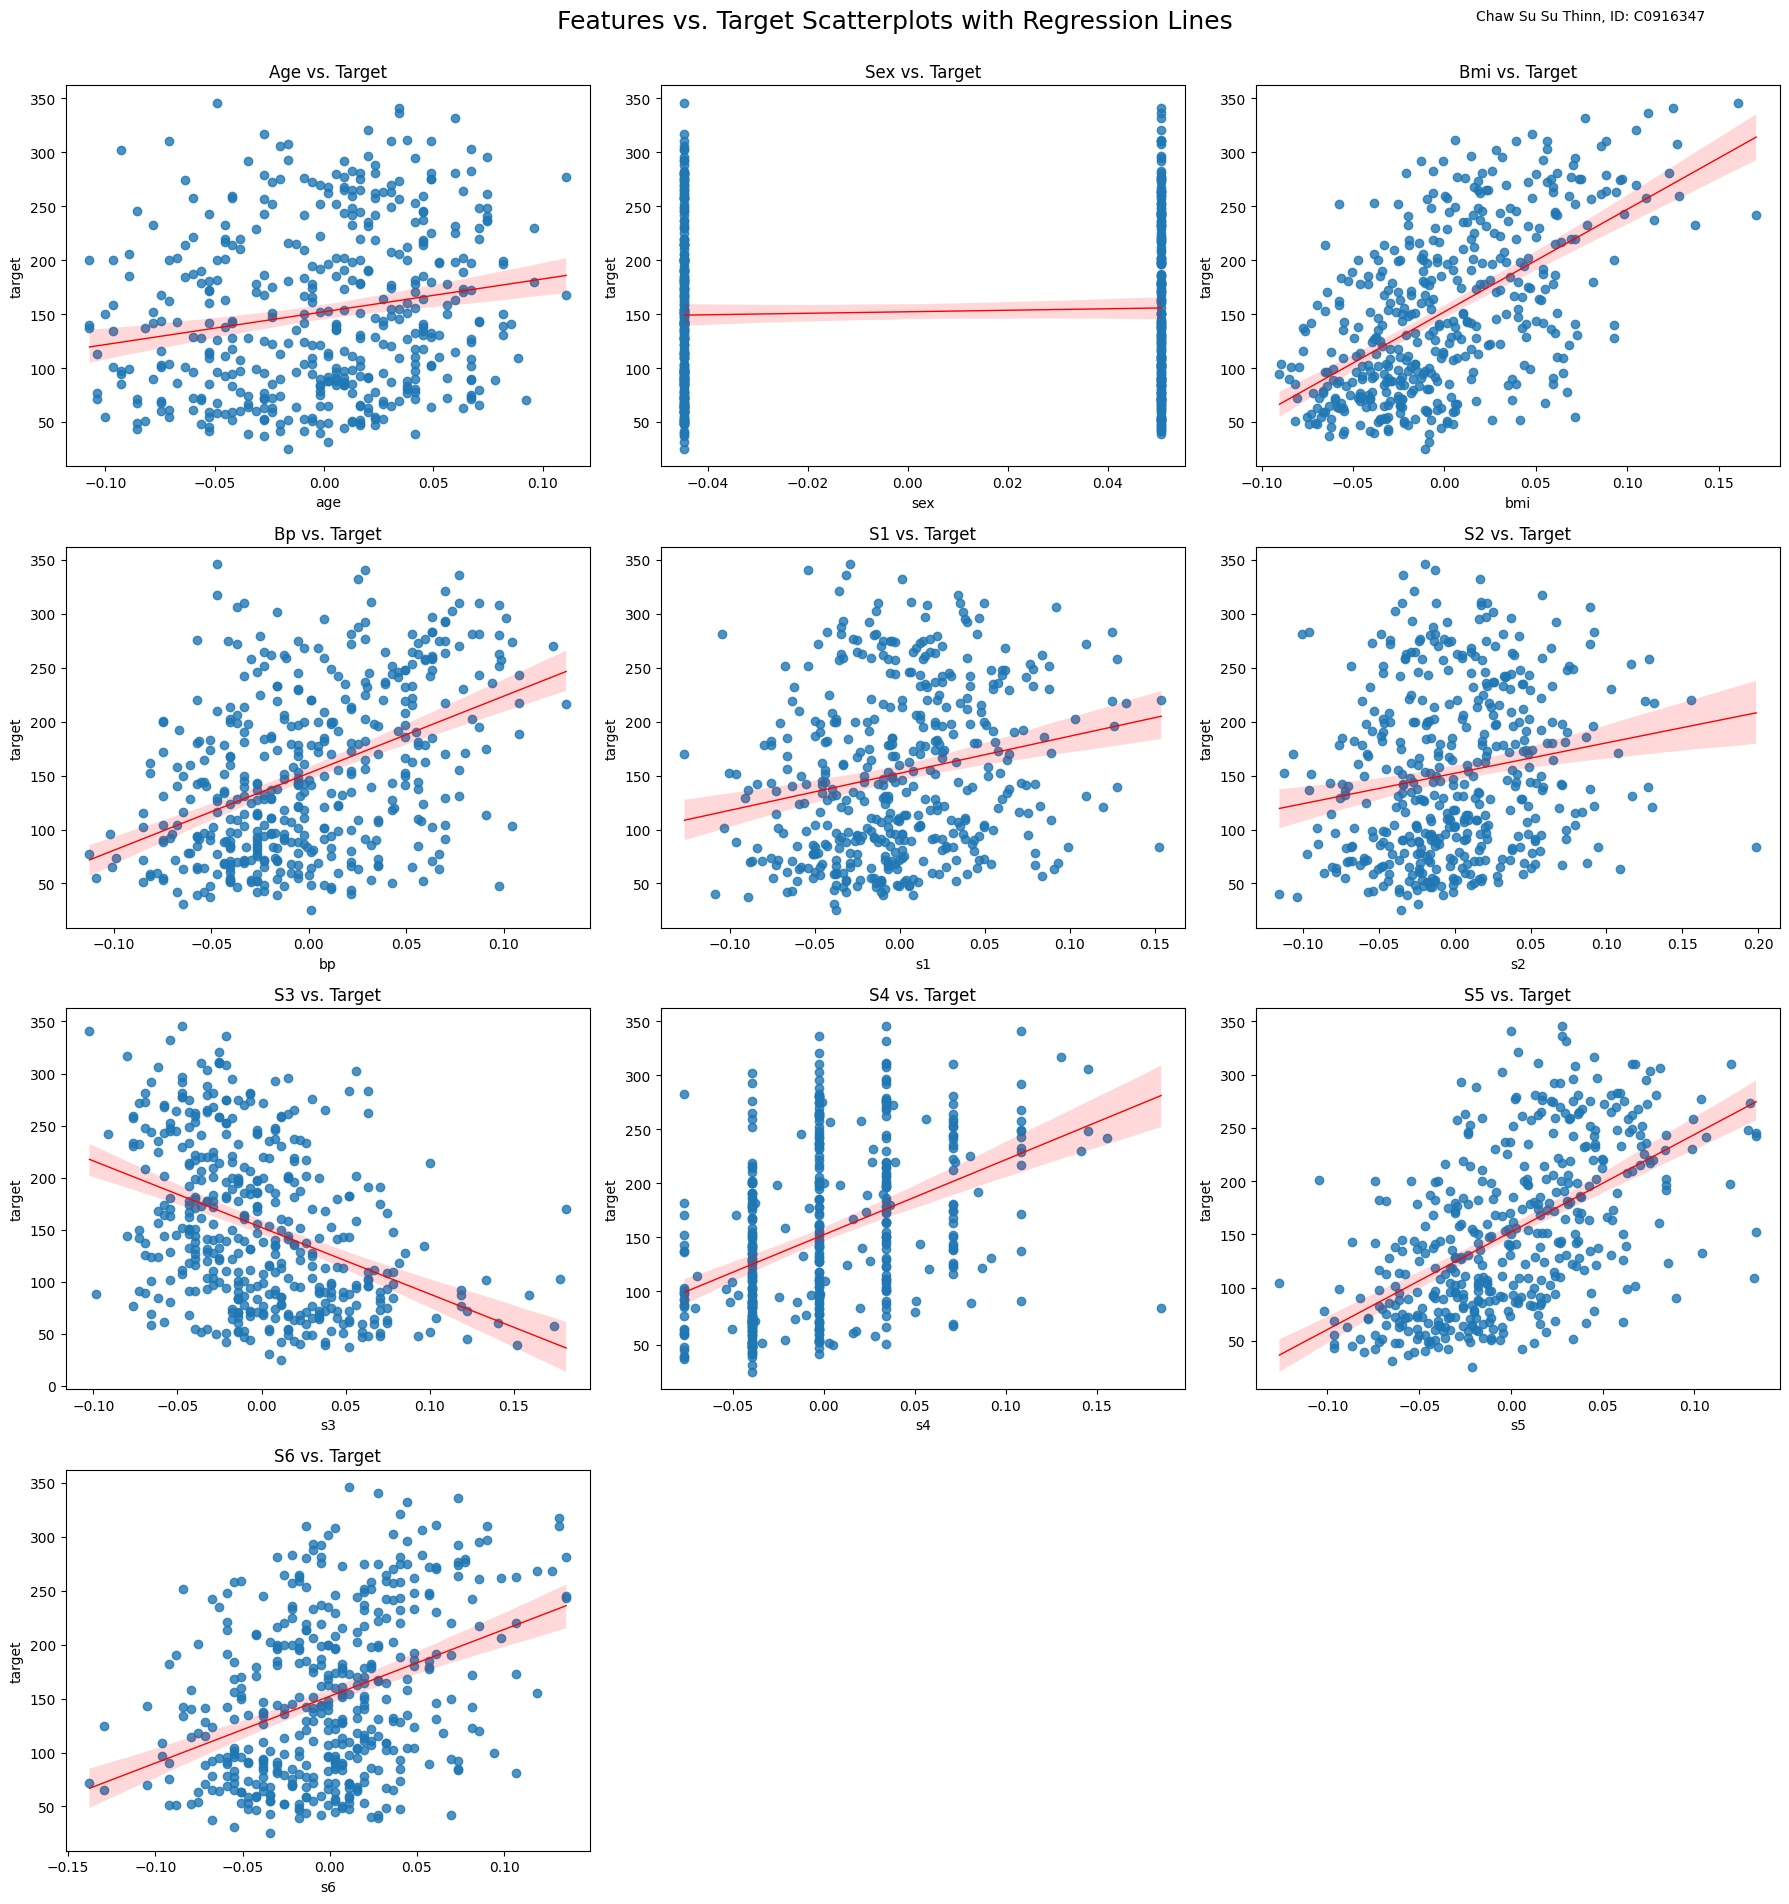

In [57]:
n_plts = len(X.columns) # number of plots
n_cols = 3 # number of cols per row
n_rows = (n_plts + n_cols - 1) // n_cols # total number of rows
width = 6*n_cols
height = 5*n_rows

# Create figure and axes
fig, axes = plt347.subplots(n_rows, n_cols, figsize=(width,height))
axes = axes.flatten()

# Set centered super title to the figure
fig.suptitle("Features vs. Target Scatterplots with Regression Lines", fontsize=18, y=0.95)

# Plot each feature vs target
for i, col in enumerate(X.columns):
    ax = axes[i]
    sns347.regplot(x=X[col], y=y, ax=ax, line_kws={"color": "red", "lw": 1}) # Plot data and a linear regression model fit with confidence level
    ax.set_title(f"{col.title()} vs. Target") # Set title for each subplot
    ax.set_xlabel(col) # Set x-axis label
    ax.set_ylabel(y.name) # Set y-axis label

# Remove empty subplots
for j in range(n_plts, len(axes)):
    fig.delaxes(axes[j])

fig.text(0.95, 0.95, "Chaw Su Su Thinn, ID: C0916347", ha='right', va='top', fontsize=10)
plt347.tight_layout(rect=[0, 0, 1, 0.95])
plt347.show()

**Analysis from Feature vs. Target Scatterplots**

The scatterplots above show the relationship between each normalized input feature and the target variable `diabetes_progression`, which is a quantitative measure of diabetes progression after one year. 

Each plot includes a linear regression line with a confidence interval, so that the viewer can visualize potential correlations clearly.

**Key Insights from the Scatterplots**

* There are 8 features which has **positive correlations** with target variable. These include `age`, `bmi`, `bp`, `s1`, `s2`, `s4`, `s5`, and `s6`. 
As the value of these features increases, the predicted diabetes progression tends to increase as well. The trend is especially steep for `bmi`, `bp` and `s5`.

* Meanwhile, there is 1 feature that has **negative correlation** with target. That is `s3` which describes **hdl, high-density lipoproteins level** based on the scikit-learn documentations. This means higher values of `s3` are associated with lower diabetes progression scores. According to the U.S. National Library of Medicine’s MedlinePlus, HDL is considered good cholesterol because higher HDL levels can lower the risk for coronary artery disease and stroke. (Medline Plus, 2019)

* Furthermore, the `sex` variable only takes on **two distinct values**, reflecting its binary nature (likely male/female, though anonymized). As a result, the scatterplot appears as two vertical bands, and the regression line is flat. This implies that there is little to no linear relationship between `sex` and the target.

Next, I am going to plot correlation matrix to confirm these correlations, and whether or not there are multicolineary issues within features.

In [58]:
# Compute pairwise correlation of columns
corr = df.corr()

# Sort and view feature correlations with target
corr_target = corr["target"].sort_values(ascending=False)
print(corr_target)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


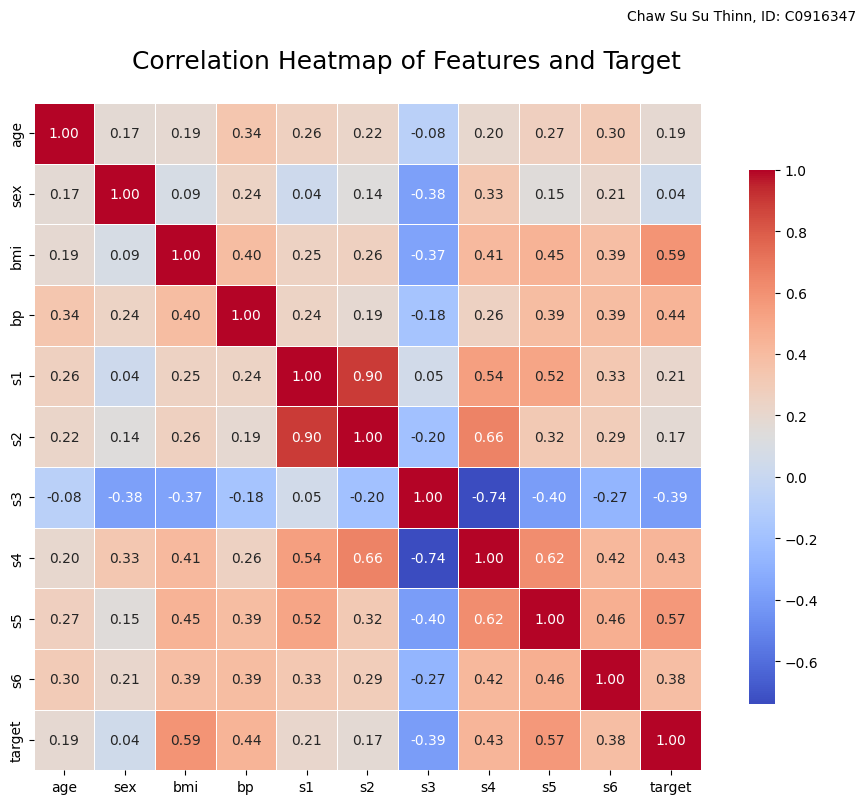

In [59]:
# Create the heatmap figure
fig, ax = plt347.subplots(figsize=(10, 8))
sns347.heatmap(
    corr, 
    annot=True, # show correlation values
    fmt=".2f", # format to 2 decimal places
    cmap="coolwarm", # set color gradient
    square=True, # square cells
    linewidths=0.5, # line between cells
    cbar_kws={"shrink": 0.8} # set colorbar size
)

# Set centered super title to the figure
fig.suptitle("Correlation Heatmap of Features and Target", fontsize=18, y=0.95)

fig.text(0.95,1, "Chaw Su Su Thinn, ID: C0916347", ha='right', va='top', fontsize=10)
plt347.tight_layout(rect=[0, 0, 1, 0.95])
plt347.show()

**Analysis of Correlation Matrix**

The heatmap shows how each feature in the dataset correlates with the target variable (diabetes progression), as well as how the features relate to each other.

**Key Insights from the Correlation Heatmap**

* Among all features, `bmi` has the **strongest positive correlation** with the target (0.59), followed closely by `s5` (0.57). These two variables are likely to be the most predictive in a linear model.

* Meanwhile, there are `bp`, `s4` and `s6` has **moderate positive correlation** with the target, with Pearson correlation coefficients of 0.44, 0.43, 0.38 respectively. These features might contribute meaningfully to the model but are less influential than `bmi` and `s5`.

* Lastly, `sex` has the **weakest correlation** (0.04). There is little to no linear relationship between `sex` and the target in this dataset. 

* On the other hand, `s3`is **negatively correlated** with the target (-0.39), which means higher values of S3 are associated with lower diabetes progression, as I observed earlier during scatterplot analysis.

* There is also evidence of **multicollinearity** among some features. The strongest case is between `s1` and `s2`, with a correlation of 0.90. Other **moderately high correlations** include `s2` and `s4` (0.66), `s4` and `s5` (0.62), and `s5` and `s1` (0.52).

* Since `s1` and `s2` are highly correlated (correlation coefficient of 0.90), I’ve decided to drop one of them. This helps avoid potential issues with unstable or inflated coefficients in the linear regression model which I will be building at later phase.

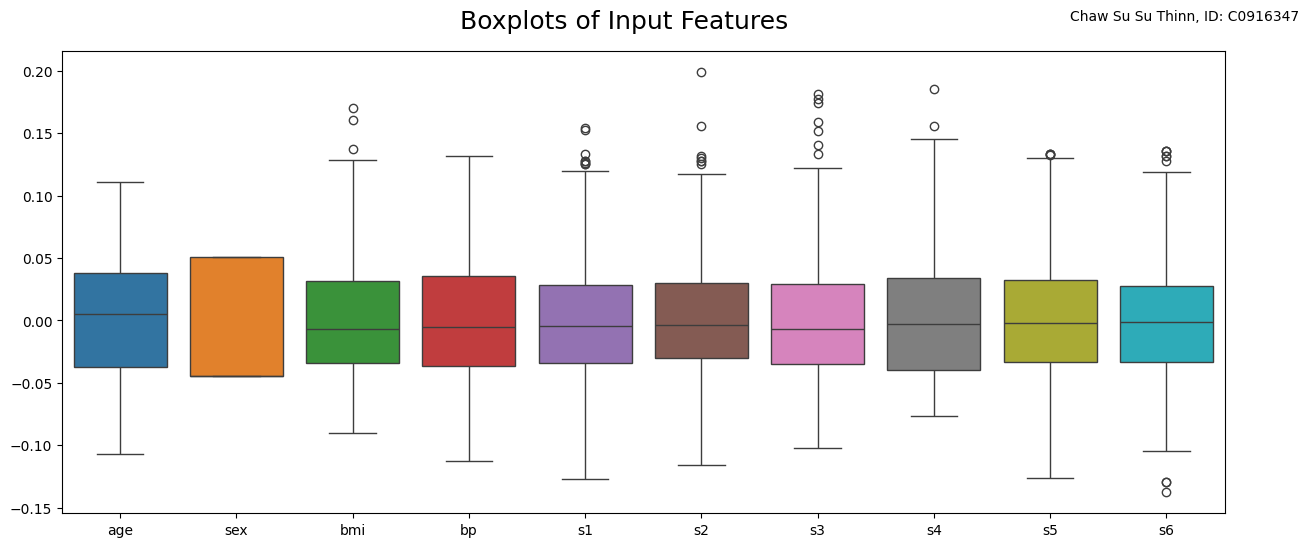

In [60]:
fig = plt347.figure(figsize=(15, 6)) 
sns347.boxplot(data=df.drop(columns='target'))
fig.suptitle("Boxplots of Input Features", fontsize=18, y=0.95)
fig.text(0.95,0.95, "Chaw Su Su Thinn, ID: C0916347", ha='right', va='top', fontsize=10)
plt347.show()

**Analysis of Feature Distribution**

This boxplot provides a visual summary of the distribution of each feature in the diabetes dataset. 

**Key Insights from the Boxplot**

* All features are centered around 0. 
   * This is expected because the dataset is mean-centered (mean ≈ 0) according to the scikit-learn documentation. 
   * Most features also have similar spread, since all of them are scaled by standard deviation.

* Outliers are present in multiple features. 
   * I can see the dots above and below the "whiskers" of some boxplots. These represent outliers. 
   * Features like `bmi`, `s1`, `s2`, `s3`, `s4`, `s5`, and `s6` show multiple upper-end outliers.
   * `s6` show outliers on the lower end.

* Spread of values (IQR) is consistent.
   * The box (interquartile range) for most features is symmetric and narrow, showing relatively uniform distributions.
   * No extreme skewness is obvious, although `sex` is more compressed — which makes sense since it’s binary, with 2 distinct values, and are scaled.

* Overall, the boxplot confirms that the dataset has been scaled and that no single feature dominates in variance.

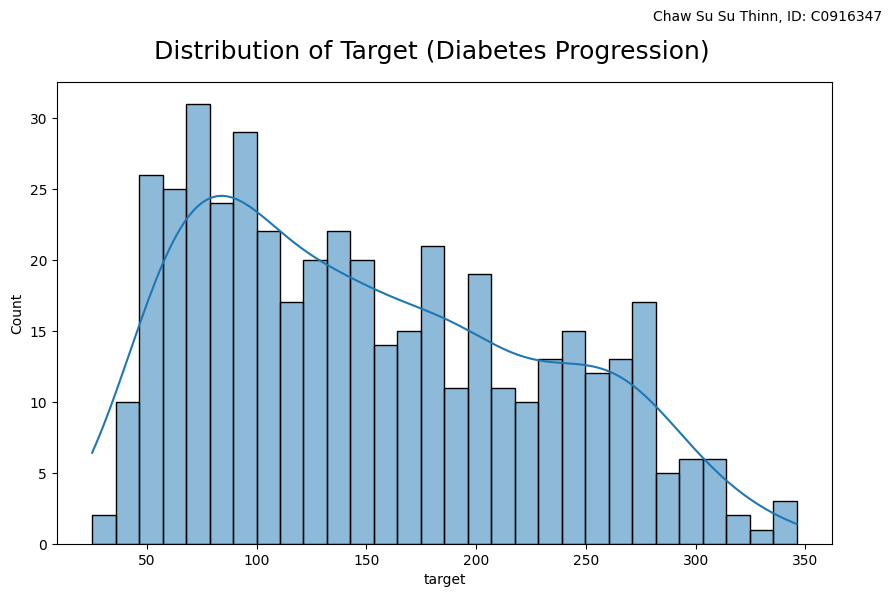

In [61]:
fig = plt347.figure(figsize=(10, 6)) 
sns347.histplot(df['target'], bins=30, kde=True)
fig.suptitle("Distribution of Target (Diabetes Progression)", fontsize=18, y=0.95)
fig.text(0.95,1, "Chaw Su Su Thinn, ID: C0916347", ha='right', va='top', fontsize=10)
plt347.show()

**Analysis of Target Distribution**

This histogram shows the distribution of the target variable: diabetes progression score, wich is the quantitative measure of disease progression one year after baseline.

**Key Insights from Histogram**

* The distribution of the target variable is **right-skewed**. There are more patients with lower progression scores.

* The majority of patients have scores between **50 and 100**. These bins contain the highest frequencies.

* The distribution has more **granularity** with 30 bins. This reveals smaller fluctuations and variation in the data.

* A **smooth curve (KDE)** is plotted on top. It shows a sharp rise in low scores, then a gradual decline.

* The overall shape does not show **normal distribution**. The long tail on the right shows that some patients have much higher progression scores.

## Data Preprocessing

### Normalize or standardize the features if necessary


In [62]:
# Verify the statistics summary of input features
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [63]:
# Verify the statistics summary of target
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

**Analysis**

* The features are already prepossed. 
    * Features are mean-centered.
    * Each column has been scaled so that the sum of squares is 1. 
* So, I will not do any additional standardization for the features.

* For the target, although it is right-skewed, I will not apply any transformation. Standard linear regression does not require the target to be normally distributed. The model will still optimize the best-fitting line using least squares.

* If the features were not standardized, I would use `StandardScaler()` from `sklearn.preprocessing` to scale them before training. This helps linear models perform better and ensures features are on the same scale.

* Normalization is typically used when working with distance-based algorithms like KNN or cosine similarity, where the magnitude of the feature vectors can bias the results. Since I'm using **linear regression** and the data is already standardized, normalization is not required here.

* If I were to use normalization, I would apply `Normalizer()` to make sure that each sample (row) have unit length. This is helpful in models where the direction of the data matters more than the magnitude, such as KNN or cosine similarity-based algorithms.

### Drop highly correlated input feature

* Since both `s1` and `s2` are highly correlated to each other, I will drop one of them to avoid multicollinearity issue. 

In [64]:
X = X.drop(columns=['s2'])
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object')

### Check for missing values and handle them appropriately


In [65]:
X.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [66]:
y.isna().sum()

np.int64(0)

**Analysis:**

* There are no missing values inside the dataframe when I checked using `isna().sum()`, so I don't need to handle them.

* If there were missing values, I would use either `dropna()` to remove them or `fillna()` to fill them.

### Split the dataset into training and testing sets (e.g., 80/20 split)

In [67]:
# Verfiy the shape before split
print(X.shape)
print(y.shape)

(442, 9)
(442,)


In [68]:
# Split into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Verify the shapes again
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 9) (353,)
(89, 9) (89,)


**Analysis**

* To evaluate the model's performance properly, I split the dataset into two parts:

    * Training set: 80% of the data

    * Testing set: 20% of the data

* This allows the model to learn patterns from the training data and then be evaluated on unseen data (the test set).

* I used `train_test_split()` from `sklearn.model_selection`, with `random_state=42` to ensure reproducibility.

* After splitting, I used `.shape` to verify the splits. 
    
    * X_train now has 353 rows.
    * X_test now has 89 rows.
    * Column size is still the same 9 columns.
    * For target y, y_train now has 353 rows, and y_test now has 89 rows.

* If I were to use a validation set (e.g. for hyperparameter tuning or model selection), I would split the training set again, using a smaller portion (e.g. 10–20%) as a validation set.

    * But since the dataset size for diabetes is relatively small (only 442 samples), further splitting would reduce the amount of training data available.

    * In such cases, it's often better to use cross-validation instead of holding out a separate validation set.

* Overall, since linear regression doesn’t involve hyperparameter tuning, I don’t need a separate validation set. However, because the dataset is small, I will use **cross-validation** to better estimate how well the model generalizes.

## Model Building

### Use LinearRegression from Scikit-learn to train the model

In [70]:
# Instantiate LinearRegression
lr = LinearRegression()

### Fit the model on the training data

In [71]:
# Train the model on the training set
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
print("Intercept:", lr.intercept_)


coef_df = pd347.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})

print(coef_df)

Intercept: 151.3010031750481
  Feature  Coefficient
0     age    43.181123
1     sex  -241.376201
2     bmi   555.709752
3      bp   344.647390
4      s1  -316.745217
5      s3   -81.325629
6      s4   241.183507
7      s5   492.772265
8      s6    53.002574


**Analysis**

* For model building, I imported `LinearRegression` from `sklearn.linear_model`.

* After that, I instantiated the model using `lr = LinearRegression()`. This creates a basic linear regression model with default settings (e.g., no regularization).

* After instantiation, I trained the model using `lr.fit(X_train, y_train)`. This step fits the model to the training data by learning the optimal coefficients (weights) and intercept that minimize the residual sum of squares between the actual and predicted values.

* After fitting, I printed the learned model parameters. 

    * First, I printed `lr.intercept_`, which is the bias term (constant) in the linear regression equation.

* To better understand the impact of each feature on the target variable, I created a DataFrame called `coef_df` that maps each feature to its corresponding learned `coefficient`. 
    * This output shows the estimated weight (slope) that the linear regression model assigned to each feature. 
    * Positive values in `coef_df` indicate a positive influence on diabetes progression, while negative values indicate a negative influence.



## Model Evaluation

### Predict values on the test set

In [73]:
# Predict on the test set
y_pred = lr.predict(X_test)

### Evaluate performance

* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* R-squared (R²) score

In [74]:
# Compute mean squared error
mse = mean_squared_error(y_test, y_pred)

# Compute root mean squared error
rmse = np347.sqrt(mse)

# Compute r2_score
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 2900.25
Root Mean Squared Error (RMSE): 53.85
R-squared (R2) Score: 0.45


**Analysis on Model Performance**

* I evaluated `LinearRegression` model performance using standard regression metrics:

    * `Mean Squared Error (MSE)` is 2900.25, which indicates the average squared difference between actual and predicted values.

    * `Root Mean Squared Error (RMSE)` is 53.85, meaning the model’s predictions are off by about 54 units on average.

    * `R-squared (R2) Score` is 0.45, suggesting the model explains around 45% of the variance in the target variable within the test set.

* Overall, `LinearRegression` the model has moderate performance. It can capture some of the underlying trend, but I can still try using regularization like Ridge and Lasso to see if there is any improvement on performance.

### Plot the predicted vs actual values (Test Set)

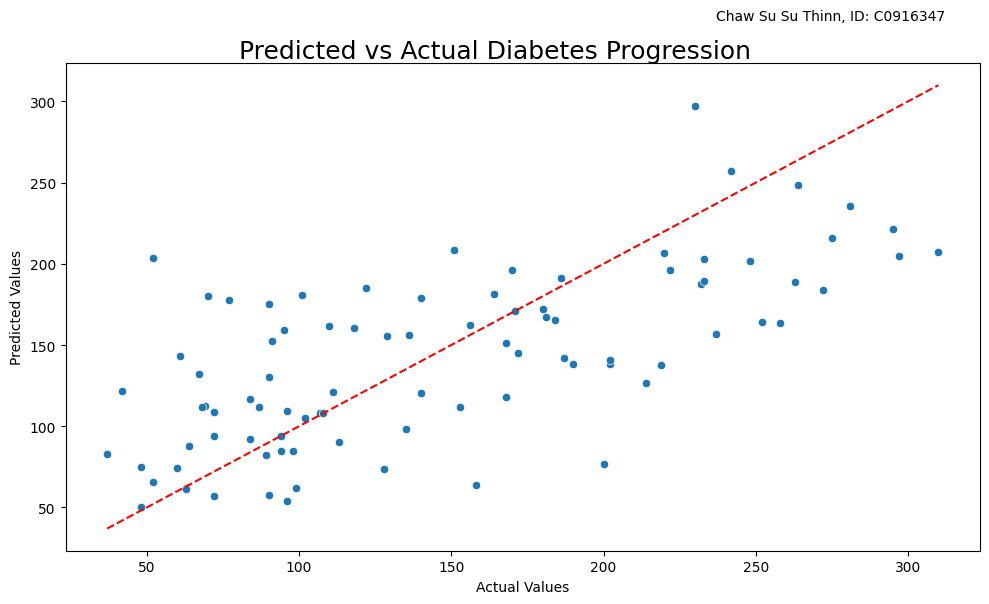

In [75]:
# Create an empty figure
fig, ax = plt347.subplots(figsize=(10, 6)) 

# Plot scatterplot on the axes
sns347.scatterplot(x=y_test, y=y_pred, ax=ax)

# Plot reference line (perfect prediction)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Add axis labels and title, and author ID
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
fig.suptitle("Predicted vs Actual Diabetes Progression", fontsize=18, y=0.95)
fig.text(0.95,1, "Chaw Su Su Thinn, ID: C0916347", ha='right', va='top', fontsize=10)

plt347.tight_layout()
plt347.show()

**Analysis on Predicted vs Actual Plot**

* Let’s take a look at this scatterplot. 

    * It visualizes how our model's predictions compare against the actual diabetes progression values in the test set.

    * Each dot here represents one patient. The x-axis shows the actual outcome, and the y-axis shows what our model predicted for that patient. 

    * > According to Scikit-learn, in a perfect, noise-free regression task, predicted values would fall exactly on the diagonal line (ŷ = y). The farther a point is from this line, the greater the error. In real-world data with noise, even a good model will produce a cloud of points roughly clustered around the diagonal. (scikit-learn 1.7.0 Documentation, 2025b)


**Key insights**

* From the scatterplot, I can make a few key observations.

    * The general trend does follow the diagonal. It means this `LinearRegression` model is capturing some signal in the data.

    * However, I can also see a fair amount of scatter, particularly away from the extremes. That variability is where the model is struggling.

    * This is backed up by the evaluation metrics I computed earlier:

        * `MSE` is 2900.25, which represents the average squared difference between the actual and predicted values.

        * `RMSE` is 53.85, so on average, the model’s predictions are off by around 54 units.

        * `R-squared` is 0.45, which means the model explains about 45% of the variance in the target variable within the test dataset.

* Overall, the model performs moderately, especially considering the small size of the training dataset (353 records).

### Plot residuals vs predicted values

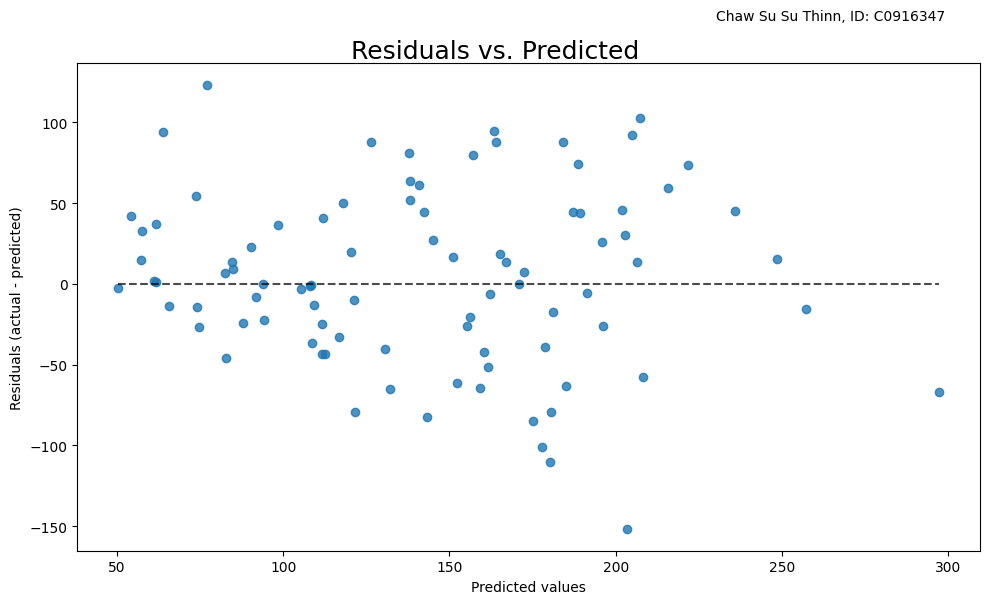

In [76]:
from sklearn.metrics import PredictionErrorDisplay

# Create an empty figure and axes
fig, ax = plt347.subplots(figsize=(10, 6)) 

# Plot prediction error on the axes
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot(ax=ax)

# Add title and author ID
fig.suptitle("Residuals vs. Predicted", fontsize=18, y=0.95)
fig.text(0.95,1, "Chaw Su Su Thinn, ID: C0916347", ha='right', va='top', fontsize=10)

plt347.tight_layout()
plt347.show()

**Analysis on Residuals vs Predicted**

* I used `PredictionErrorDisplay` from scikit-learn to plot `Residuals vs. Predicted` and visually assess the model's performance.

    > "Visualization of the prediction error of a regression model. This tool can display “residuals vs predicted” or “actual vs predicted” using scatter plots to qualitatively assess the behavior of a regressor, preferably on held-out data points." (scikit-learn 1.7.0 Documentation, 2025c)

    > "The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable. The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal. No one residual "stands out" from the basic random pattern of residuals. This suggests that there are no outliers." (The Pennsylvania State University, 2018)

* Figure: residuals versus fits plot (The Pennsylvania State University, 2018)
        
    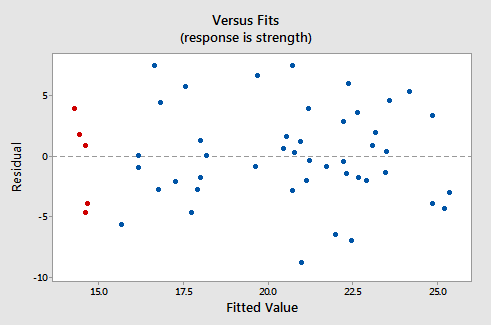

**Key insights**

* In my case, I observe from the plot that, 

    * The residuals are roughly centered around zero, supporting the linearity assumption.

    * They form a relatively even spread, with no clear funneling or curvature, which supports constant variance (homoscedasticity).

    * A few extreme points exist, but no residual drastically stands out. This suggest that there are no major outliers.

* Overall, the plot provides reasonable support for the linear regression assumptions.

**Next step**

* I will plot this again with highlighted outliers like the example from (The Pennsylvania State University, 2018).

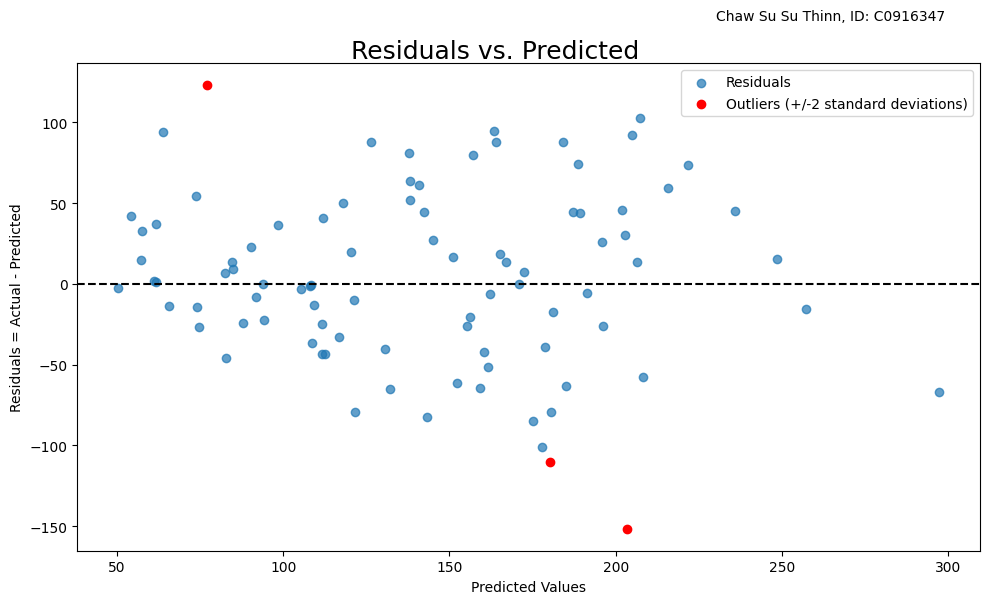

In [77]:
# Compute residuals
residuals = y_test - y_pred

# Compute threshold for outliers (+/-2 standard deviations)
std_res = np347.std(residuals)
outlier_mask = np347.abs(residuals) > 2 * std_res

# Create an empty figure and axes
fig, ax = plt347.subplots(figsize=(10, 6)) 

# Plot non-outlier points on the axes
ax.scatter(y_pred[~outlier_mask], residuals[~outlier_mask], label="Residuals", alpha=0.7)

# Plot outlier points in red on the existing axes
ax.scatter(y_pred[outlier_mask], residuals[outlier_mask], color='red', label="Outliers (+/-2 standard deviations)")

# Add reference horizontal line at 0
ax.axhline(0, color='black', linestyle='--')

# Add axis labels and title, and author ID
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals = Actual - Predicted")
fig.suptitle("Residuals vs. Predicted", fontsize=18, y=0.95)
fig.text(0.95, 1, "Chaw Su Su Thinn, ID: C0916347", ha='right', va='top', fontsize=10)
ax.legend()

plt347.tight_layout()
plt347.show()

**Analysis of Outliers from Residuals Plot**

* In the residuals vs. predicted plot, I highlighted data points that fall outside **+/-2 standard deviations** from the mean residual. 

* These are potential outliers, i.e. observations whose prediction errors are unusually large compared to the rest of the dataset.

**Key insights**

* Based on the plot, I can see that here are 3 outliers on top left end and bottom middle-right end. 

* These points show larger-than-usual differences between the actual and predicted values, meaning the model didn’t perform well on these particular observations.

* One outlier at the top left shows `residual > 100`. Since `residual = actual - predicted`, in this case, acutal value is much greater than predicted. This can be translated as the model underestimated this point, and by more than 100 units.  

* The two red points below the horizontal line show large negative residuals (approximately -100 and - 150). This means that acutal values are much lower than the predicted. So, in these two points, the model overestimated.

* Overall, there are only 3 outliers beyond ±2 standard deviations. These points have large residuals and indicate where the model made the biggest prediction errors.

**Next step**

* Next, I am going to plot the Q-Q plot of residuals to assess normality.

### Plot Q-Q plot of residuals

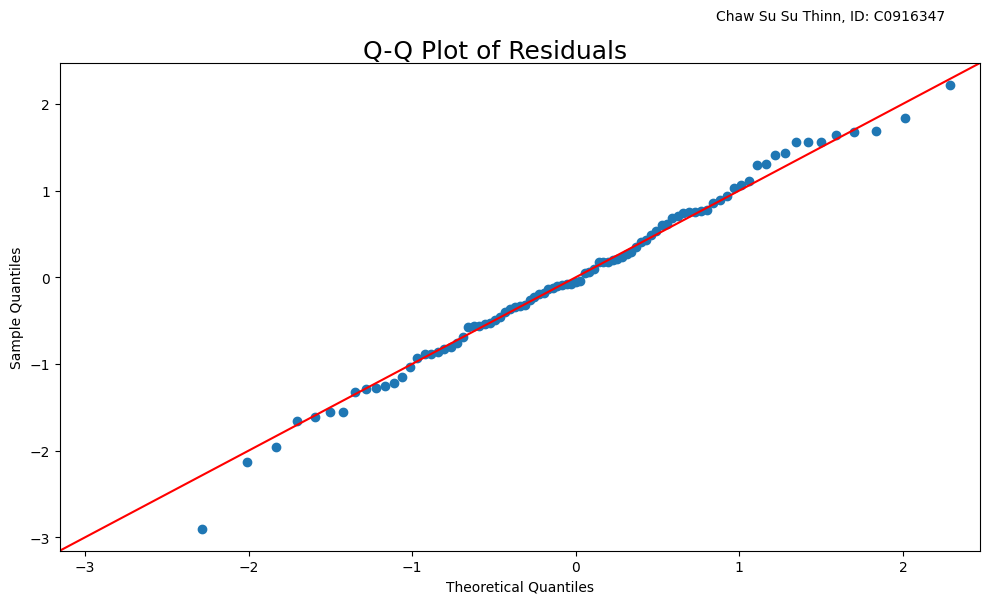

In [78]:
# Create an empty figure and axes
fig, ax = plt347.subplots(figsize=(10, 6)) 

# Plot Q-Q plot of residuals on the axes
sm347.qqplot(residuals, line='45', fit=True, ax=ax)

# Add title and author ID
fig.suptitle("Q-Q Plot of Residuals", fontsize=18, y=0.95)
fig.text(0.95,1, "Chaw Su Su Thinn, ID: C0916347", ha='right', va='top', fontsize=10)

plt347.tight_layout()
plt347.show()

**Analysis from Q-Q plot in Linear Regression**

* I used a Q–Q plot to check whether the residuals from my linear regression model are normally distributed.

    > As stated in DataCamp tutorial, "A Q‑Q plot helps in particular with that fourth linear model assumption, the normality of residuals… Straight Line Alignment means the residuals are approximately normal, indicating the model fits the data well in terms of the normality assumption." (DataCamp, 2024) 

    * Figure: Three Q-Q plots (DataCamp, 2024)

        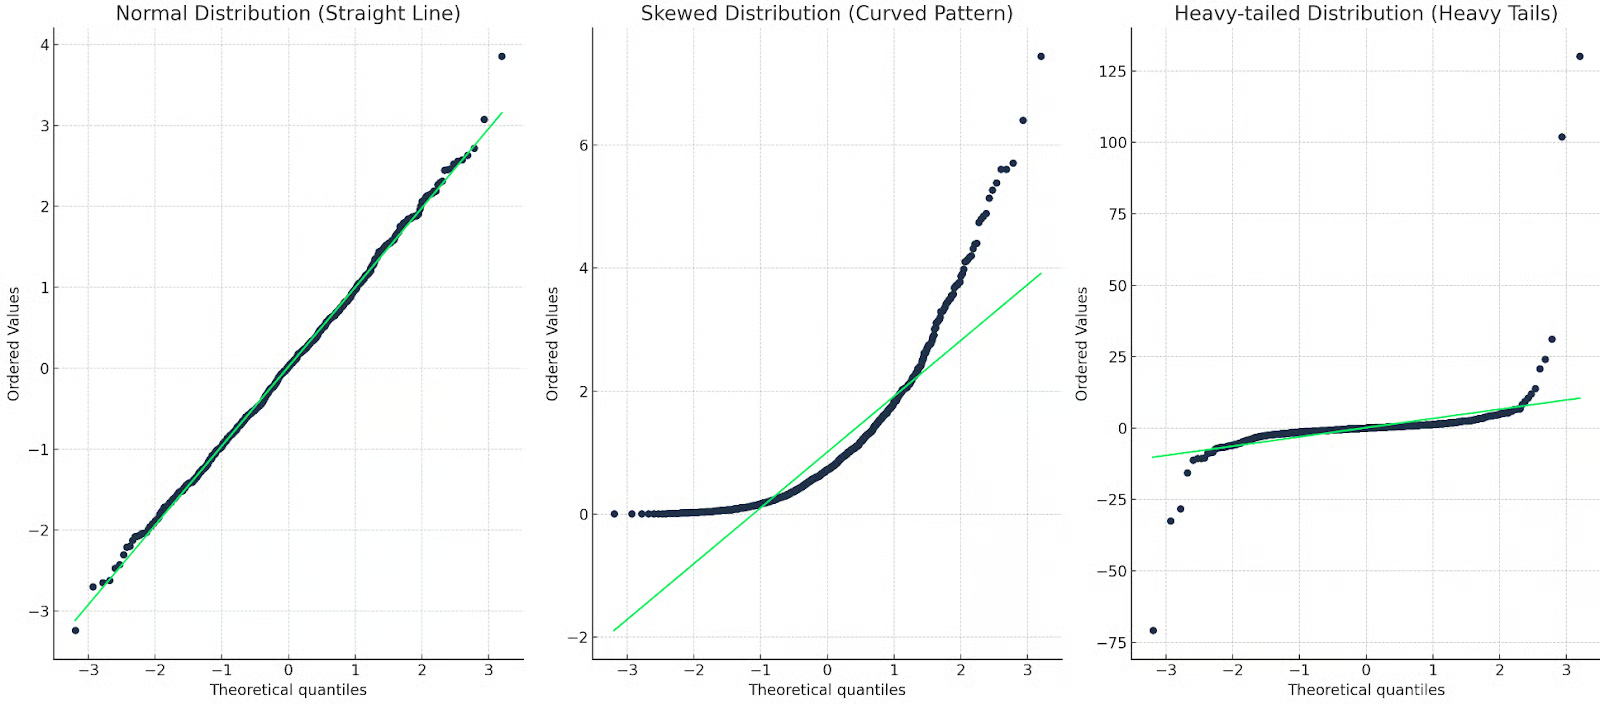

    * This assumption matters because many things we do with linear regression, like confidence intervals and hypothesis tests, rely on residuals being normally distributed. 

    * In a Q–Q plot, we compare the quantiles of the model's residuals with the quantiles of a normal distribution. If they fall along the diagonal line, it suggests the residuals are normal.

* In my case, the Q-Q plot shows that most residuals follow the straight diagonal line, even though there are some minor deviations at the tails. This suggests the normality assumption is likely reasonable.

## Model Interpretation

### Print out model coefficients and intercept

In [79]:
# Print the intercept (bias term) of the Linear Regression model
print("Intercept:", lr.intercept_)

# Create dataframe to display the coefficients for each input feature
coeff_df = pd347.DataFrame({
    'Feature': X_test.columns,
    'Coefficient': lr.coef_
})

# Sort coefficients by descending absolute value
coeff_df = coeff_df.sort_values(by='Coefficient', key=abs, ascending=False) # use abs to see which features matter regardless of direction (+ or -)

# Display the dataframe
print("Coefficients:\n", coeff_df)

Intercept: 151.3010031750481
Coefficients:
   Feature  Coefficient
2     bmi   555.709752
7      s5   492.772265
3      bp   344.647390
4      s1  -316.745217
1     sex  -241.376201
6      s4   241.183507
5      s3   -81.325629
8      s6    53.002574
0     age    43.181123


**Analysis on intercept and coefficident values**

* I printed the `Intercept` value of `LinearRegression` model and it is 151.30. This is the expected baseline value of the target (disease progression) when all feature values are zero (not always meaningful in practice, but required by the model).

* After that, I printed `Coefficient` for each input feature. 

    * Amongst them:
        * `bmi`, `s5` and `bp` are the top 3 positive contributors. 
        * `bmi` which indicates body mass index of the patient has the **strongest positive effect** (~555.70) on diabetes progression.
        * `s5` has coefficient of ~492.77, followed by `bp` which has ~344.64.

    * Meanwhile, there are two negative contributors.
        * `s1` has the stongest negative influence, with coefficient at -316.74.
        * `sex` also have negative coefficient of 241.37.
    
    * This is followed by `s4` with positive coefficient of 241.18.

    * The rest `s3`, `s6` and `age` have coefficients -81.32, 53.00, and 43.18 respectively. Thease are considered as the low impact features.

**Next step**

* I will plot the coefficients with sorted magnitude to see a clear picture. 

### Discuss which features have the most significant impact on diabetes progression

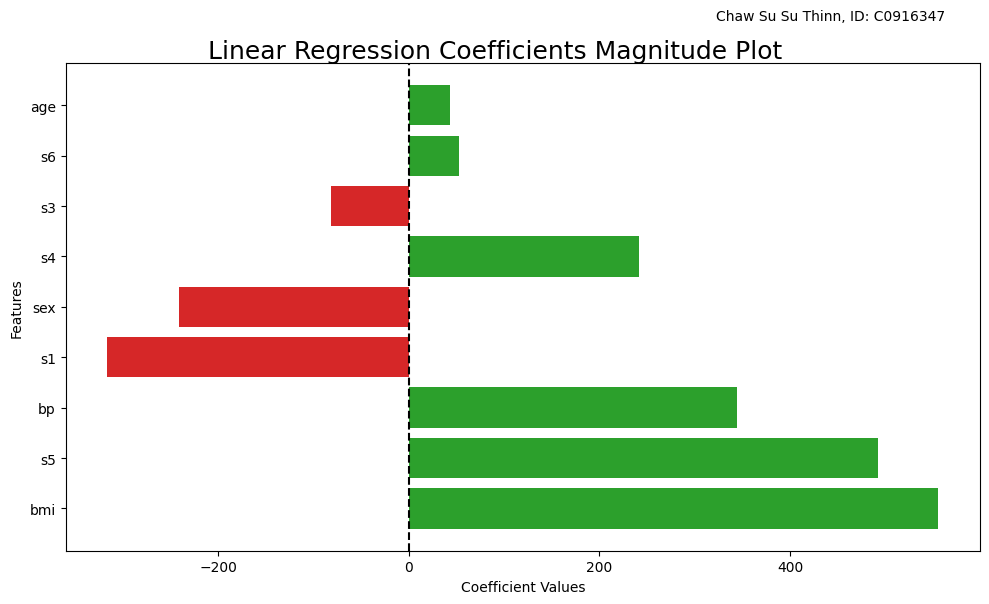

In [80]:
# Create an empty figure and axes
fig, ax = plt347.subplots(figsize=(10, 6))

# Plot feature coefficients as horizontal bars
bars = ax.barh(
    coeff_df['Feature'],
    coeff_df['Coefficient'],
    color=["tab:green" if c > 0 else "tab:red" for c in coeff_df['Coefficient']]
)

# Add reference vertical line at 0
ax.axvline(0, color='black', linestyle='--')

# Add axis labels and title, and author ID
ax.set_xlabel("Coefficient Values")
ax.set_ylabel("Features")
fig.suptitle("Linear Regression Coefficients Magnitude Plot", fontsize=18, y=0.95)
fig.text(0.95, 1, "Chaw Su Su Thinn, ID: C0916347", ha='right', va='top', fontsize=10)

plt347.tight_layout()
plt347.show()


**Analysis on the features that have most significant impact**

* So, if I were to ask "Which features matter most for diabetes progression", I can clearly explain based on the LinearRegression Coefficient Magnitude Plot. 

* From the plot, I can describe top 3 features that matter most:

    * `bmi` has the biggest impact on the prediction. 
        * People with higher body mass index are more likely to have faster diabetes progression. 

    * Next is `s5`, which indicates serum triglycerides level. 
        * It also has a strong positive effect. 
        * This make sense since according to MedlinePlus, "high triglycerides can lead to atherosclerosis, which raises the risk of heart attack and stroke." (Medline Plus, 2017)
        * That shows why this feature might be such a strong predictor in the model. 

    * This is followed by `bp` which indicates blood pressure. 
        * Higher blood pressure is linked with faster diabetes progression.

* On the other hand, `s1` and `sex` have negative coefficients. 
    * That means when those values go up, the predicted diabetes progression goes down.
    * But `s1` indicates serum total cholesterol, yet it has negative coefficient in the model. This seems unlikely since as stated in MedlinePlus, "a high total cholesterol level may lead to atherosclerosis. This increases your risk for heart attack and stroke." (Medline Plus, 2022). 
    * However, this might be due to overlap with other features like `s4` and `s5` also relate to cholesterol and triglycerides. As I observed earlier during EDA, `s1` is moderately correlated with `s4` and `s5`. 
    
        * Figure: Correlation: 
        
            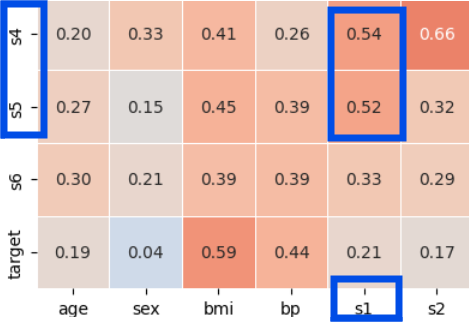

    * The model could be splitting the signal between them. So just because the coefficient is negative doesn't mean high cholesterol is protective. It could just be how the model adjusted based on the other inputs.

    * For `sex`, the model shows a negative coefficient, which means higher values of sex reduce the predicted outcome. That could mean males (if coded higher) tend to have lower predicted diabetes progression in this sample. It might reflect patterns in this dataset, not necessarily real-world biology.

* This is followed by `s4`, that indicates TCH, total cholesterol / HDL. It has moderate amount of positive impact on diabetes progression.

* Other features like `s3` (HDL, high-density lipoproteins), `s6` (GLU, blood sugar level), and `age` don’t have much impact. Their bars are small, so they don’t affect the prediction as much.

### Reflect on any assumptions of linear regression and whether they seem to be satisfied

To assess whether the assumptions of linear regression are reasonably satisfied, I relied on visual diagnostics:

* **Linearity**:
  The residuals vs. predicted plot shows a random scatter around zero, which supports the assumption of a linear relationship between features and the target.

* **Normality of residuals**:
  The Q-Q plot indicates that the residuals are approximately normally distributed, suggesting this assumption holds.

* **Homoscedasticity (constant variance of errors)**:
  The residuals appear to form a horizontal band around zero without a clear funnel shape, which supports constant variance.

* **Independence**:
  Since this is not a time-series dataset, and the samples are assumed to be independent, this assumption is likely satisfied.

* **Multicollinearity**:
  During EDA, I observed some moderate correlations between features (e.g., `s1`, `s4`, `s5`), but regularization methods like Lasso were applied later to mitigate potential collinearity effects.

Overall, based on the diagnostic plots and feature checks, the key assumptions of linear regression appear reasonably satisfied for this dataset.

**Next steps**

* I plan to perform K-Fold Cross-Validation to obtain a more robust estimate of model performance across different splits of the data.

    > As noted in the scikit-learn documentation, “learning the parameters of a prediction function and testing it on the same data is a methodological mistake.” Cross-validation helps address this by holding out part of the data for testing, which ensures the model is evaluated on unseen data and reduces the risk of overfitting. (scikit-learn 1.7.0 Documentation, 2025a)

## Cross-validation

In [81]:
# Set 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate MSE scores by cross-validation
lr_cv_mse = -cross_val_score(lr, X, y, cv=cv, scoring='neg_mean_squared_error')

# Evaluate RMSE scores by cross-validation
lr_cv_rmse = np347.sqrt(lr_cv_mse)

# Evaluate R-squared scores by cross-validation
lr_cv_r2 = cross_val_score(lr, X, y, cv=cv, scoring='r2')

# Print scores per fold
print("Linear Regression Cross-validation Results")
for i in range(len(lr_cv_mse)):
    print(f"Fold {i+1}:")
    print(f"MSE:  {lr_cv_mse[i]:.2f}")
    print(f"RMSE: {lr_cv_rmse[i]:.2f}")
    print(f"R-squared:   {lr_cv_r2[i]:.2f}")
    print()

# Print mean scores
mean_lr_mse = round(np347.mean(lr_cv_mse), 2)
mean_lr_rmse = round(np347.mean(lr_cv_rmse), 2)
mean_lr_r2 = round(np347.mean(lr_cv_r2), 2)

print(f"Mean MSE (LinearRegression): {mean_lr_mse}")
print(f"Mean RMSE (LinearRegression): {mean_lr_rmse}")
print(f"Mean R-squared (LinearRegression): {mean_lr_r2}")

Linear Regression Cross-validation Results
Fold 1:
MSE:  2900.25
RMSE: 53.85
R-squared:   0.45

Fold 2:
MSE:  2690.56
RMSE: 51.87
R-squared:   0.57

Fold 3:
MSE:  3327.72
RMSE: 57.69
R-squared:   0.39

Fold 4:
MSE:  2827.18
RMSE: 53.17
R-squared:   0.58

Fold 5:
MSE:  3363.13
RMSE: 57.99
R-squared:   0.40

Mean MSE (LinearRegression): 3021.77
Mean RMSE (LinearRegression): 54.91
Mean R-squared (LinearRegression): 0.48


**Analysis from cross-validation**

> As stated in the scikit-learn documentation, “A model is trained using k – 1 of the folds as training data; the resulting model is validated on the remaining part of the data … The performance measure reported by k‑fold cross‑validation is then the average of the values computed in the loop.” (scikit-learn 1.7.0 Documentation, 2025a)

* I used 5‑fold cross‑validation because it allows me to train the model on most of the data each time and validate on unseen data, without throwing away any samples. 

* It’s especially important here since the diabetes dataset is small (353 records), and cross-validation provides a more reliable estimate of how the model will generalize.

**Key observations from the results**

* The R-squared values range from 0.39 to 0.58, which shows some variability but no extreme outliers. This suggests the model is relatively stable across folds.

* On average, the model explains about 48% of the variance in the target variable.

* The average RMSE of ~54.91 indicates the typical prediction error is around 55 units.

Overall, the model performance is fair given the dataset size.

**Next step**

* Next, I am going to apply regularization techniques (like Ridge or Lasso regression) to see if they improve the model’s performance. 

* I will evaluate the models using 5-fold cross-validation, which helps ensure the performance metrics (MSE, RMSE and R²) are reliable and not dependent on a single train-test split.

* After that, I’ll compare the results with the baseline linear regression to assess if there's a meaningful improvement.

## Regularization

In [82]:
# Set up 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Ridge regression
ridge = Ridge(alpha=1.0)
ridge_mse = -cross_val_score(ridge, X, y, cv=cv, scoring='neg_mean_squared_error')
ridge_rmse = np347.sqrt(ridge_mse)
ridge_r2 = cross_val_score(ridge, X, y, cv=cv, scoring='r2')

# Lasso regression
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso_mse = -cross_val_score(lasso, X, y, cv=cv, scoring='neg_mean_squared_error')
lasso_rmse = np347.sqrt(lasso_mse)
lasso_r2 = cross_val_score(lasso, X, y, cv=cv, scoring='r2')

In [83]:
# Print scores per fold
print(" Regression Cross-validation Results")
for i in range(len(ridge_mse)):
    print(f"Fold {i+1}:")
    print(f"MSE: {ridge_mse[i]:.2f}")
    print(f"RMSE: {ridge_rmse[i]:.2f}")
    print(f"R-squared: {ridge_r2[i]:.2f}")
    print()

# Print mean scores
mean_ridge_mse = round(np347.mean(ridge_mse), 2)
mean_ridge_rmse = round(np347.mean(ridge_rmse), 2)
mean_ridge_r2 = round(np347.mean(ridge_r2), 2)

print(f"Mean MSE (Ridge): {mean_ridge_mse}")
print(f"Mean RMSE (Ridge): {mean_ridge_rmse}")
print(f"Mean R-squared (Ridge): {mean_ridge_r2}")

 Regression Cross-validation Results
Fold 1:
MSE: 3078.34
RMSE: 55.48
R-squared: 0.42

Fold 2:
MSE: 3426.47
RMSE: 58.54
R-squared: 0.45

Fold 3:
MSE: 3637.20
RMSE: 60.31
R-squared: 0.33

Fold 4:
MSE: 3367.62
RMSE: 58.03
R-squared: 0.50

Fold 5:
MSE: 3675.76
RMSE: 60.63
R-squared: 0.34

Mean MSE (Ridge): 3437.08
Mean RMSE (Ridge): 58.6
Mean R-squared (Ridge): 0.41


**Key insights from Ridge Regression cross-validation results**

* The R-squared values range from 0.33 to 0.50. It shows moderate predictive power, but slightly less consistent than the baseline `LinearRegression`.

* RMSE stays in the mid-to-high 50s, averaging around 58.6, which is slightly higher than the linear regression baseline.

* Overall, Ridge regression doesn’t seem to improve performance here. This is possibly due to the small dataset size and the fact that L2 regularization doesn’t drop any features.

**Next step**

* I’ll compare this with Lasso regression to see if a sparse model helps or hurts performance.

In [84]:
# Print scores per fold
print("Lasso Regression Cross-validation Results")
for i in range(len(lasso_mse)):
    print(f"Fold {i+1}:")
    print(f"MSE: {lasso_mse[i]:.2f}")
    print(f"RMSE: {lasso_rmse[i]:.2f}")
    print(f"R-squared: {lasso_r2[i]:.2f}")
    print()

# Print mean scores
mean_lasso_mse = round(np347.mean(lasso_mse), 2)
mean_lasso_rmse = round(np347.mean(lasso_rmse), 2)
mean_lasso_r2 = round(np347.mean(lasso_r2), 2)

print(f"Mean MSE (Lasso): {mean_lasso_mse}")
print(f"Mean RMSE (Lasso): {mean_lasso_rmse}")
print(f"Mean R-squared (Lasso): {mean_lasso_r2}")

Lasso Regression Cross-validation Results
Fold 1:
MSE: 2798.24
RMSE: 52.90
R-squared: 0.47

Fold 2:
MSE: 2804.00
RMSE: 52.95
R-squared: 0.55

Fold 3:
MSE: 3393.36
RMSE: 58.25
R-squared: 0.38

Fold 4:
MSE: 2761.22
RMSE: 52.55
R-squared: 0.59

Fold 5:
MSE: 3361.79
RMSE: 57.98
R-squared: 0.40

Mean MSE (Lasso): 3023.72
Mean RMSE (Lasso): 54.93
Mean R-squared (Lasso): 0.48


**Key insights from Lasso Regression cross-validation results**

* `Lasso` shows better performance than `Ridge` in this case. The mean R-squared is 0.48, which is noticeably higher than Ridge’s 0.41.

* RMSE also improves, dropping to 54.93 compared to Ridge’s 58.60.

* This suggests that some level of feature sparsity (coefficients being pushed toward zero) is actually beneficial here, likely due to the dataset's small size and some irrelevant or collinear features.

* Based on these results, `Lasso` performs better than both `Ridge `and the baseline `LinearRegression` for this dataset.

## Model Performance Comparison

In [85]:
# Define models and metrics
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Mean MSE': [mean_lr_mse, mean_ridge_mse, mean_lasso_mse],
    'Mean RMSE': [mean_lr_rmse, mean_ridge_rmse, mean_lasso_rmse],
    'Mean R-Squared': [mean_lr_r2, mean_ridge_r2, mean_lasso_r2]
}

# Create DataFrame
results_df = pd347.DataFrame(results)

# Display the table
results_df

,Model,Mean MSE,Mean RMSE,Mean R-Squared
0,Linear Regression,3021.77,54.91,0.48
1,Ridge Regression,3437.08,58.60,0.41
2,Lasso Regression,3023.72,54.93,0.48


**Analysis on Model Performance Comparison**

* All three models: Linear Regression, Ridge, and Lasso were evaluated using 5-fold cross-validation.

    * **Linear Regression** and **Lasso Regression** performed similarly, both achieving a `Mean RMSE` around 54.9 and an `R-Squared` of 0.48. These two models can explain about 48% of the variance in the target variable.

    * Whereas, **Ridge Regression** showed slightly worse performance, with a `Mean RMSE` of 58.60 and an `R-Squared` of 0.41.

    * In terms of error, **Linear Regression** had the lowest `Mean MSE` 3021.77, followed very closely by **Lasso Regression** wtih `Mean MSE` of 3023.72.

* Overall, `Lasso` provided similar performance to `Standard Linear Regression`, while `Ridge` did not improve generalization and slightly worsened it in this case.

## Report / Presentation

**Summary of Findings**

Here, I want to summarize overall findings, and key insights I mentioned earlier.

**Which variables were most predictive**

* `bmi` had the largest positive impact on diabetes progression.
* `s5` (serum triglycerides) and `bp` (blood pressure) also showed strong positive influence.
* `s1` (total cholesterol) and `sex` had negative coefficients, possibly due to feature correlation.

**Overall model performance**

* Initial Evaluation (No Cross-Validation)

    * I first evaluated the `LinearRegression` model using standard regression metrics on the test set:
        * Mean Squared Error (MSE) = 2900.25 which indicates the average squared difference between actual and predicted values.
        * Root Mean Squared Error (RMSE) = 53.85, so on average, predictions are off by about 54 units.
        * R-squared (R2) score = 0.45, the model explains approximately 45% of the variance in the target variable on the test set.

* Cross-Validation Comparison (5-Fold CV)

    * Then, to improve reliability and account for variance, I ran 5-fold cross-validation on `LinearRegression`, followed by `Ridge` and `Lasso`.
    * Summary of the results are as follows:
        * `Linear Regression` and `Lasso` both achieved mean RMSE ≈ 54.9 and R² = 0.48
        * `Ridge` performed worse, with mean RMSE = 58.60, R² = 0.41
        * `Linear Regression` had the lowest mean MSE (3021.77), slightly better than `Lasso` (3023.72)

* Overall, cross-validation confirms that `Lasso` generalizes just as well as `Linear Regression`, and better than `Ridge` in this dataset.

**Insights from the visualization**

* The coefficient magnitude plot reveals that `bmi`, `s5`, and `bp` have the strongest positive influence on the `Linear Regression` model's predictions. Features like `s1` and `sex` show strong negative coefficients, indicating inverse relationships with diabetes progression.

* Residuals vs. predicted plot showed 3 potential outliers beyond +/- 2 standard deviations.

* Q-Q plot indicated that the residuals are approximately normally distributed, supporting the model assumptions.

## Reference list

Matplotlib.org. (2025). matplotlib.axes.Axes.scatter — Matplotlib 3.10.3 Documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter [Accessed 23 Jun. 2025].

matplotlib.org. (n.d.). matplotlib.pyplot.suptitle — Matplotlib 3.6.2 Documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html [Accessed 23 Jun. 2025].

Medline Plus (2017). Triglyceride level: MedlinePlus Medical Encyclopedia. [online] Medlineplus.gov. Available at: https://medlineplus.gov/ency/article/003493.htm [Accessed 24 Jun. 2025].

Medline Plus (2019). HDL: the ‘Good’ Cholesterol. [online] Medlineplus.gov. Available at: https://medlineplus.gov/hdlthegoodcholesterol.html [Accessed 23 Jun. 2025].

Medline Plus (2022). Total cholesterol: MedlinePlus Medical Encyclopedia. [online] Medlineplus.gov. Available at: https://medlineplus.gov/ency/article/007813.htm [Accessed 24 Jun. 2025].

pandas.pydata.org. (n.d.). pandas.DataFrame.corr — Pandas 1.3.2 Documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html [Accessed 23 Jun. 2025].

Pydata.org. (2016). Merge, join, Concatenate and Compare — Pandas 2.3.0 Documentation. [online] Available at: https://pandas.pydata.org/docs/user_guide/merging.html#concatenating-series-and-dataframe-together [Accessed 23 Jun. 2025].

scikit-learn 1.7.0 Documentation. (2025a). 3.1. Cross-validation: Evaluating Estimator Performance — . [online] Available at: https://scikit-learn.org/stable/modules/cross_validation.html [Accessed 24 Jun. 2025].

scikit-learn 1.7.0 Documentation. (n.d.). 3.3. Metrics and scoring: Quantifying the Quality of Predictions. [online] Available at: https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error [Accessed 24 Jun. 2025].

scikit-learn 1.7.0 Documentation. (2025b). 3.4. Metrics and scoring: Quantifying the Quality of Predictions. [online] Available at: https://scikit-learn.org/stable/modules/model_evaluation.html#visual-evaluation-of-regression-models [Accessed 24 Jun. 2025].

scikit-learn 1.7.0 Documentation. (2025c). PredictionErrorDisplay. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PredictionErrorDisplay.html#predictionerrordisplay [Accessed 24 Jun. 2025].

scikit-learn 1.7.0 Documentation. (2025d). sklearn.metrics.r2_score. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#r2-score [Accessed 24 Jun. 2025].

scikit-learn. (2022). sklearn.datasets.load_diabetes. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html [Accessed 23 Jun. 2025].

seaborn.pydata.org. (n.d.). seaborn.regplot — Seaborn 0.11.1 Documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.regplot.html [Accessed 23 Jun. 2025].

seaborn.pydata.org. (2024). seaborn.scatterplot — Seaborn 0.11.1 Documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.scatterplot.html.

Statsmodels.org. (2025). statsmodels.graphics.gofplots.qqplot - statsmodels 0.15.0 (+661). [online] Available at: https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html [Accessed 24 Jun. 2025].

The Pennsylvania State University (2018). 4.2 - Residuals vs. Fits Plot | STAT 462. [online] online.stat.psu.edu. Available at: https://online.stat.psu.edu/stat462/node/117/ [Accessed 24 Jun. 2025].

Waples, J. (2024). The Q-Q Plot: What It Means and How to Interpret It. [online] Datacamp.com. Available at: https://www.datacamp.com/tutorial/qq-plot.

Waskom, M. (2024). seaborn.heatmap — Seaborn 0.10.1 Documentation. [online] seaborn.pydata.org. Available at: https://seaborn.pydata.org/generated/seaborn.heatmap.html [Accessed 23 Jun. 2025].